# Step 1: Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Explanation:
1. 'numpy' is imported to handle numerical computations efficiently.
2. 'matplot.pyplot' is imported to plot graphs.
3. 'tensorflow' is imported to work with neural networks and datasets.
4. 'keras' from TensorFlow is imported to access the MNIST dataset and build neural network models.odels

# Step 2: Loading the MNIST dataset

In [3]:
# load MNIST dataset
digit_mnist = keras.datasets.mnist

# Step 3: Importing and Preprocessing data

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


* We import the data using 'load_data()' method from the MNIST dataset.
* The pixel values are normalized to the range [0,1] by dividing by 255.0.

# Step 4: Creating Validation set

In [5]:
X_valid, X_train = X_train_full[:6000], X_train_full[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

* We split the training data into a validation set('X_valid','y_valid') and a reduced training set ('X_train','y_train').

# Step 5: Creating the ANN Model

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

C:\Users\prem3\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 6: Compiling the Model

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

* We compile the model specifying the loss function, optimizer, and metrics to monitor during training.

# Step 7: Training the Model

In [8]:
history = model.fit(X_train, y_train, epochs=60,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7183 - loss: 1.0777 - val_accuracy: 0.9122 - val_loss: 0.3208
Epoch 2/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9087 - loss: 0.3206 - val_accuracy: 0.9288 - val_loss: 0.2505
Epoch 3/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9264 - loss: 0.2564 - val_accuracy: 0.9390 - val_loss: 0.2167
Epoch 4/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9395 - loss: 0.2135 - val_accuracy: 0.9473 - val_loss: 0.1921
Epoch 5/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9469 - loss: 0.1909 - val_accuracy: 0.9497 - val_loss: 0.1755
Epoch 6/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9520 - loss: 0.1696 - val_accuracy: 0.9558 - val_loss: 0.1561
Epoch 7/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9566 - loss: 0.1552 - val_accuracy: 0.9598 - val_loss: 0.1461
Epoch 8/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9598 - loss: 0.1397 -

* We train the model using the 'fit()' method on the training data.
* We specify the number of epochs (60) and the validation data to monitor the model's performance on the validation set during training.

# Step 8: Plotting Loss and Accuracy

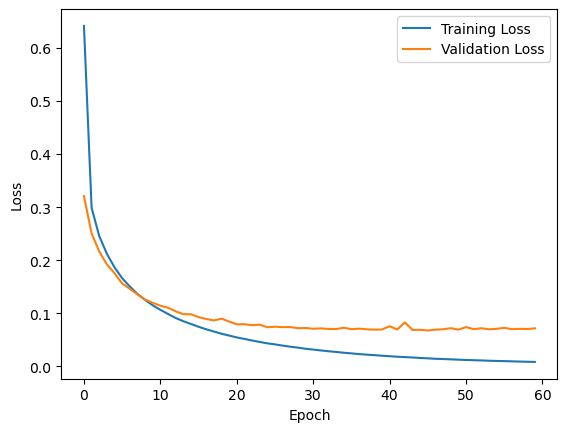

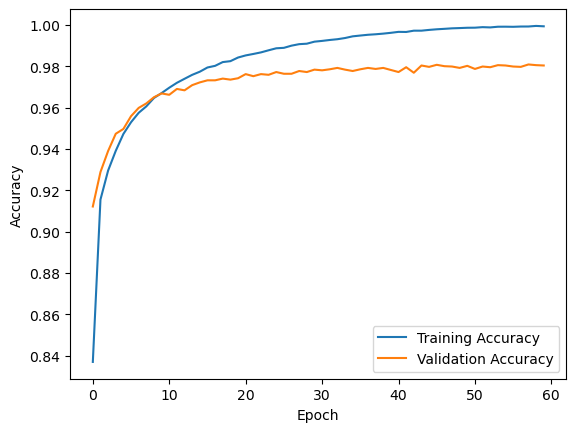

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* We plot the training and validation loss against the number of epochs to visualize the model's learning curve.
* Similarly, we plot the training and validation accuracy against the number of epochs.

# Step 9: Evaluating the Model on the Test Dataset

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0906
Test Loss: 0.07324066758155823
Test Accuracy: 0.9783999919891357


* We evaluate the trained model on the test dataset using the 'evaluate()' method.
* We print the test loss and accuracy.

# Step 10: Making Predictions

In [11]:
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted Labels for the first 5 records:", predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Predicted Labels for the first 5 records: [7 2 1 0 4]


* We make predictions on the first 5 records of the test dataset using the 'predict()' method.
* We extract the predicted labels by taking the index of the maximum value along the axis=1 (i.e., along the columns).
* Finally, we print the predicted labels